<font size=+3 color="#FFA500">**Manchas Solares**</font>

<font size=+2>Alumno:</font>

<font size=+2 color="#adb5bd">Morales Volosín, Juan Ignacio</font><br>

<font size=+2>Curso:</font>

<font size=+1 color="#adb5bd">Data Science II: Machine Learning para la Ciencia de Datos</font>

<font size=+1 color="#adb5bd">Comisión 60955</font>

<font size=+2>Profesor:</font>

<font size=+1 color="#adb5bd">Paredes, Julio</font>

<font size=+2>Tutor:</font>

<font size=+1 color="#adb5bd">Reale, Victor Adrián</font>

## Contexto

### Actividad Solar y Consecuencias

Sobre la superficie solar pueden observarse, mediante los instrumentos adecuados, zonas comparativamente oscuras. Se deben a la intensa actividad magnética de nuestra estrella, el Sol, y aunque se las denomine manchas, sus dimensiones pueden ser mayores a las de la Tierra. La cantidad de estas manchas solares varía a lo largo del tiempo con una cierta periodicidad, presentando máximos y mínimos.

Por otro lado, estas áreas oscuras en el Sol se encuentran estrechamente relacionadas con otros fenómenos, como las erupciones solares y las eyecciones de masa coronal. Tales sucesos causan la emisión de radiaciones electromagnéticas y partículas cargadas, que viajan por el espacio y, eventualmente, pueden llegar a la Tierra.

En dicho caso, la interacción con el campo magnético y la atmósfera terrestres puede dar lugar a tormentas geomagnéticas. Asimismo, las partículas cargadas y las radiaciones electromagnéticas pueden interferir o dañar equipo electrónico, tanto en órbita como en tierra. En algunas ocasiones, los efectos pueden ser graves, causando interferencias o pérdidas de servicios de comunicación, navegación u otros.

### Un Caso Real y la Importancia de Predecir Estos Fenómenos

El 3 de febrero de 2022 [SpaceX lanzó 49 satélites Starlink a bordo de su cohete Falcon 9](https://lanzamientosespaciales.com/calendario/falcon-9-b5-starlink-4-7/), pero al día siguiente una tormenta solar causó una ligera expansión la atmósfera terrestre. Por pequeña que sea la resistencia aerodinámica a ~250 km de altitud, el leve incremento fue suficiente para causar que las órbitas de los satélites se redujera irreversiblemente. Un total de 40 se perdió reingresando a nuestra atmósfera.

Se trata solamente de un ejemplo puntual

## Bibliotecas

In [ ]:
# Instalaciones

!pip install pmdarima
!pip install tbats
!pip install ptitprince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 903.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 3.7 MB/s eta 0:00:00
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10654 sha256=afda7fa0620c34f12900ce5177f395e7553520deb55f757a1077c052c826bcdc
  Stored in directory: /root/.cache/pip/wheels/0e/43/31/e76a3bf61865543f076a9d9eb027a740caefb379424ecba4e8
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
# Importaciones

# Manejo de datos
import numpy as np
import pandas as pd
from datetime import datetime
# Visualización
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import ptitprince as pt
# Aprendizaje automático
## Scikit-Learn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
## Statsmodels
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
## PMDARIMA
import pmdarima as pm
from pmdarima import auto_arima
## TBATS
from tbats import TBATS
# Sistema
import warnings

## Configuraciones

In [ ]:
# Eliminación de límite de filas y de columnas al mostrar DataFrames de pandas
# (No aplica al usar print())
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# Modificación del ancho de la consola para impresión (aplica a print())
pd.set_option('display.width', 800)

In [ ]:
# Suprimir mensajes de advertencia
warnings.filterwarnings("ignore")

## Funciones Personalizadas

In [ ]:
def analiza_df(df):
    cant_filas = df.shape[0]
    cant_colms = df.shape[1]
    s_cant_nulos = df.isnull().sum()
    total_nulos = df.isnull().sum().sum()
    # Prepara un DataFrame de reporte
    df_verif = pd.DataFrame(
        {
            'tp_dato': [df[col].dtype.name for col in df.columns],
            '#_unico': [df[col].nunique() for col in df.columns],
            '#_!nulo': cant_filas - s_cant_nulos,
            '#_nulos': s_cant_nulos,
            '%_nulos': 100 * df.isnull().mean().round(4)
        }
    )

    print(df_verif, '\n')
    print('Además:\n')
    print(f'El total de nulos es: {total_nulos}\n')
    print(f'Y el DataFrame tiene {cant_filas} filas y {cant_colms} columnas.')

## Carga de Datos

<font size=+1>Fuente:</font>

<u>**Sunspots**</u>

https://www.kaggle.com/datasets/robervalt/sunspots



In [ ]:
df_sunsp = pd.read_csv(
    'https://raw.githubusercontent.com/juanimoralesv/coderhdatascience02/main/DSci02--26--Sunspots.csv',
    index_col = 0
)
print(df_sunsp.head())

         Date  Monthly Mean Total Sunspot Number
0  1749-01-31                               96.7
1  1749-02-28                              104.3
2  1749-03-31                              116.7
3  1749-04-30                               92.8
4  1749-05-31                              141.7


In [ ]:
df_sunsp['Date'] = pd.to_datetime(df_sunsp['Date'])
df_sunsp = df_sunsp.rename(columns = {'Monthly Mean Total Sunspot Number': 'mean_sn', 'Date': 'date'})
df_sunsp = df_sunsp.set_index('date')
df_sunsp = df_sunsp.asfreq('M')
analiza_df(df_sunsp)
print()
print(df_sunsp.head(10))

         tp_dato  #_unico  #_!nulo  #_nulos  %_nulos
mean_sn  float64     1599     3265        0      0.0 

Además:

El total de nulos es: 0

Y el DataFrame tiene 3265 filas y 1 columnas.

            mean_sn
date               
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
1749-06-30    139.2
1749-07-31    158.0
1749-08-31    110.5
1749-09-30    126.5
1749-10-31    125.8


## Exploración

Se realiza una descripción estadística del conjunto de datos.

In [ ]:
print(df_sunsp.describe().round(2).T)

          count   mean    std  min   25%   50%    75%    max
mean_sn  3265.0  81.78  67.89  0.0  23.9  67.2  122.5  398.2


Se muestra en un gráfico de línea las cantidades medias de manchas solares, `mean_sn`, mes a mes.

In [ ]:
fig = px.line(
    df_sunsp,
    x = df_sunsp.index,
    y = 'mean_sn',
    template = 'plotly_dark',
    title = 'Cantidad de Manchas Solares'
)
fig.update_traces(textposition = 'top center')
fig.show()

Se realiza un histograma para entender visualmente la distribución de los valores de la variable `mean_sn`.

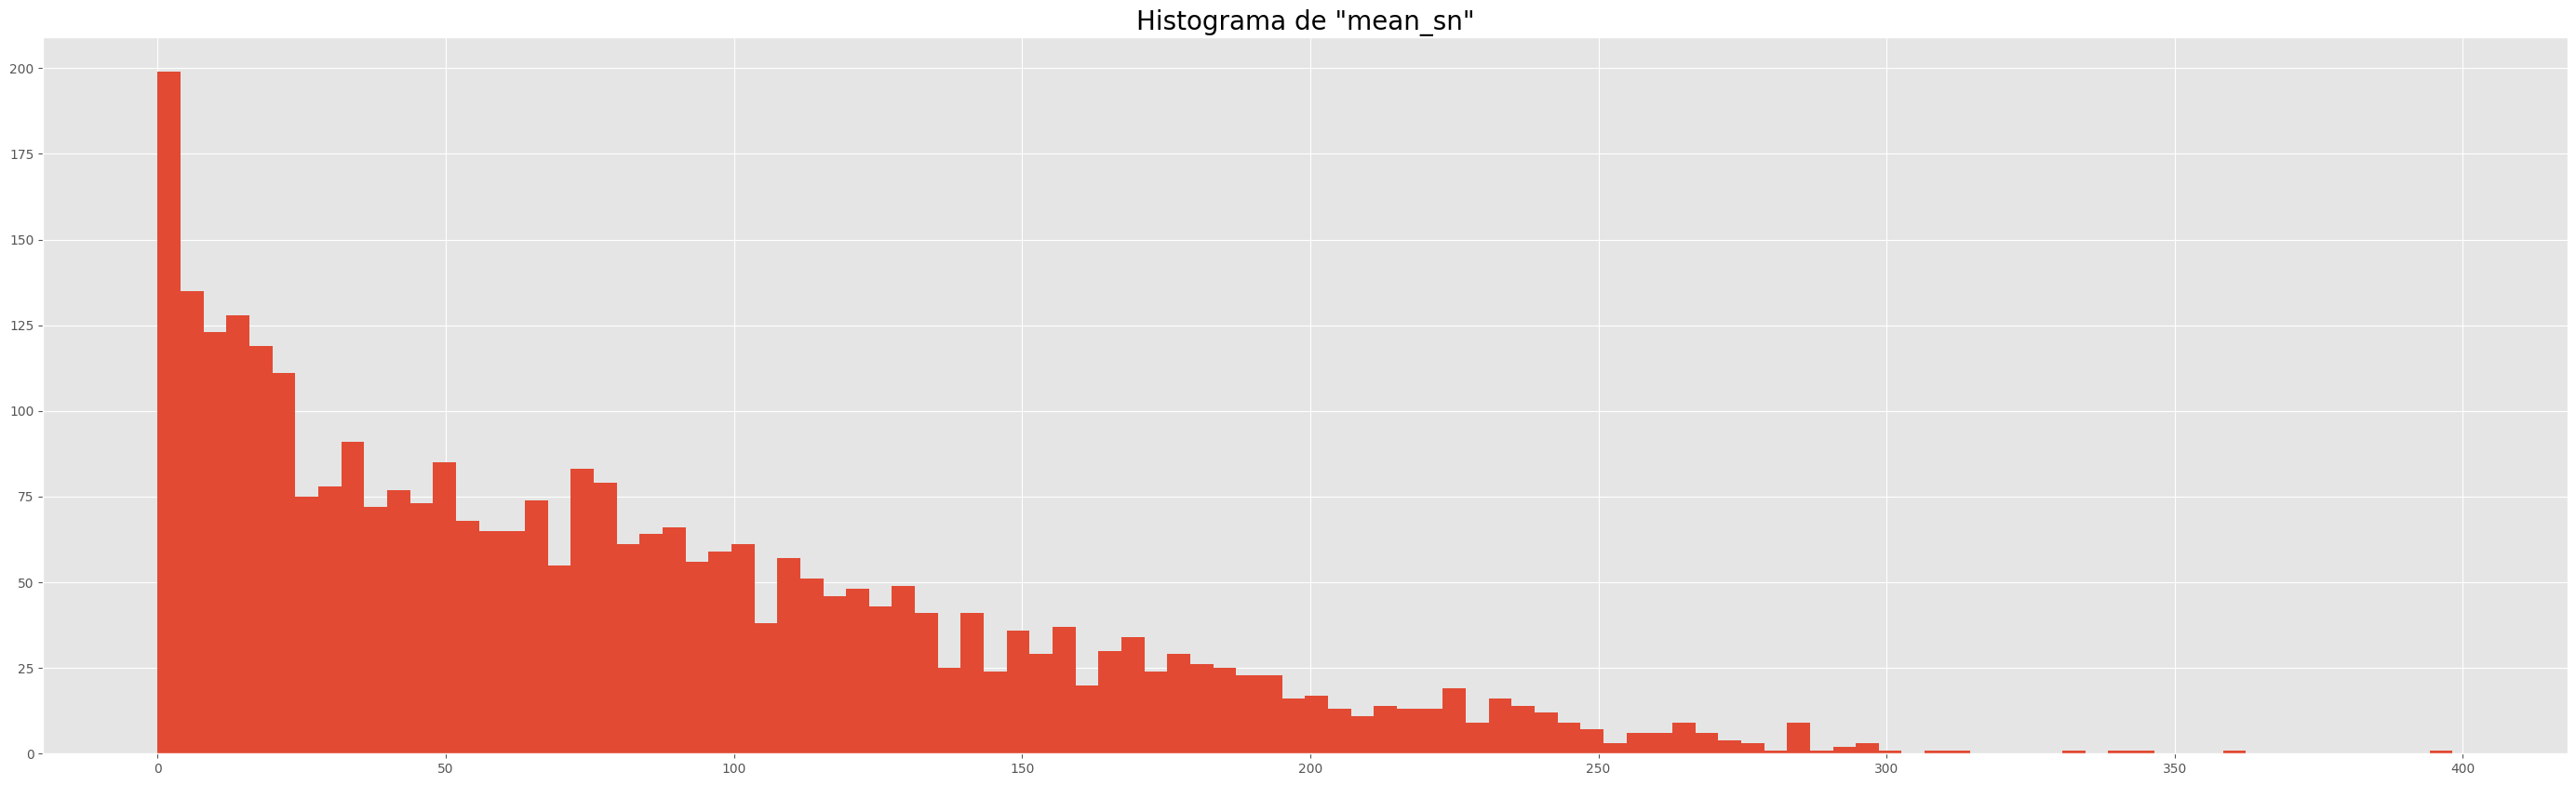

In [ ]:
ax = df_sunsp['mean_sn'].hist(figsize = (35, 10), bins = 100)
ax.set_title('Histograma de "mean_sn"', fontsize = 20)
plt.style.use('dark_background')
plt.show()

Se observa la distribución de los valores nuevamente, combinando un gráfico de medio violín, uno de puntos y uno de caja y bigotes.

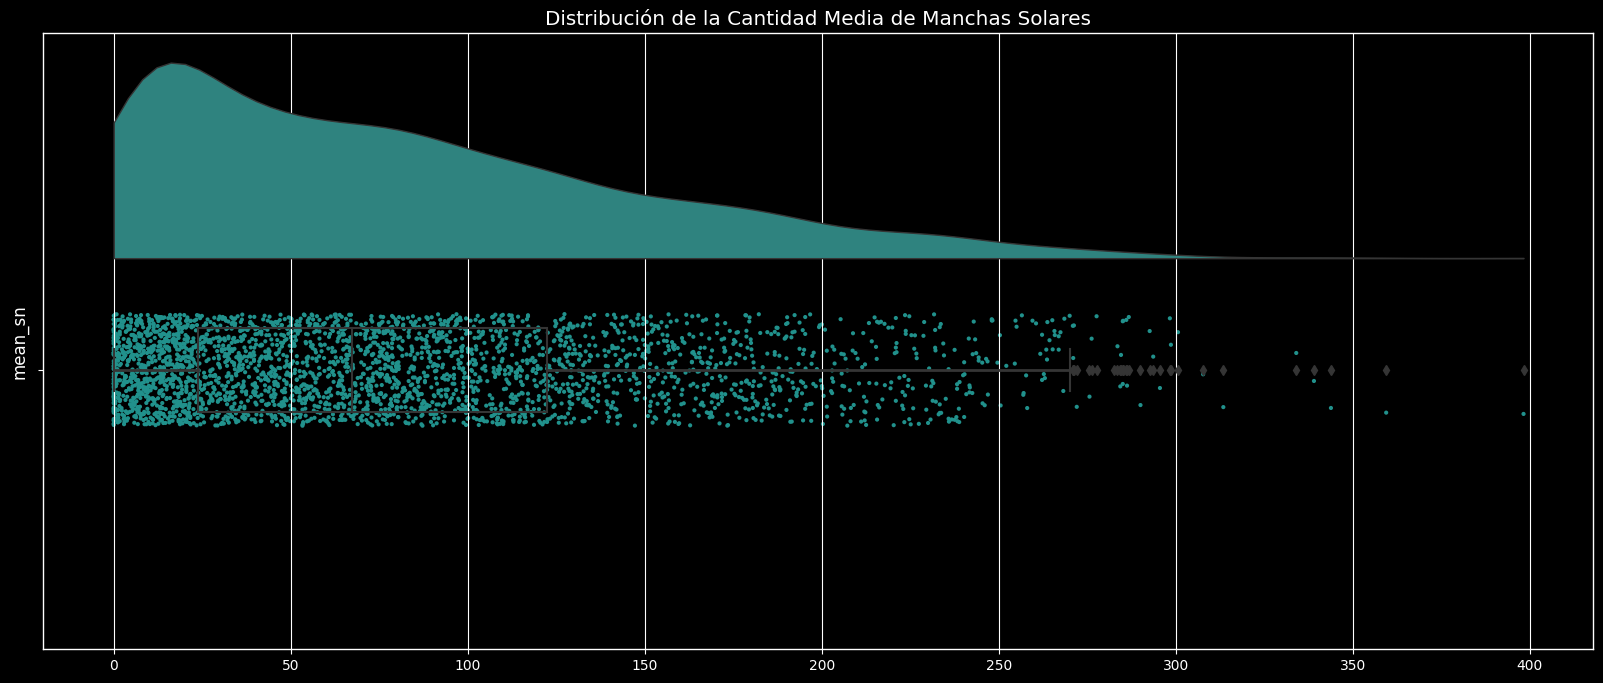

In [ ]:
# Uso de Matplotlib y Ptitprince
# Gráfico
plt.figure(figsize = (20, 8))
rainplot = pt.RainCloud(data = df_sunsp, x = 'mean_sn', palette = 'viridis', point_size = 3)
rainplot.plot()
# Mostrar el gráfico
plt.title('Distribución de la Cantidad Media de Manchas Solares')
plt.xlabel('')
plt.ylabel('mean_sn')
plt.show()

Se observan las primeras y las últimas filas del conjunto de datos.

In [ ]:
print(df_sunsp.head(10))
print()
print(df_sunsp.tail(10))

            mean_sn
date               
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
1749-06-30    139.2
1749-07-31    158.0
1749-08-31    110.5
1749-09-30    126.5
1749-10-31    125.8

            mean_sn
date               
2020-04-30      5.2
2020-05-31      0.2
2020-06-30      5.8
2020-07-31      6.1
2020-08-31      7.5
2020-09-30      0.6
2020-10-31     14.4
2020-11-30     34.0
2020-12-31     21.8
2021-01-31     10.4


Se corrobora, así, que las observaciones de la cantidad media mensual de manchas solares se extienden desde enero de 1749 hasta enero de 2021.

## Descomposición de la Serie Temporal

Solamente descomposición aditiva, porque la multiplicativa no es adecuadada para valores cero o negativos.

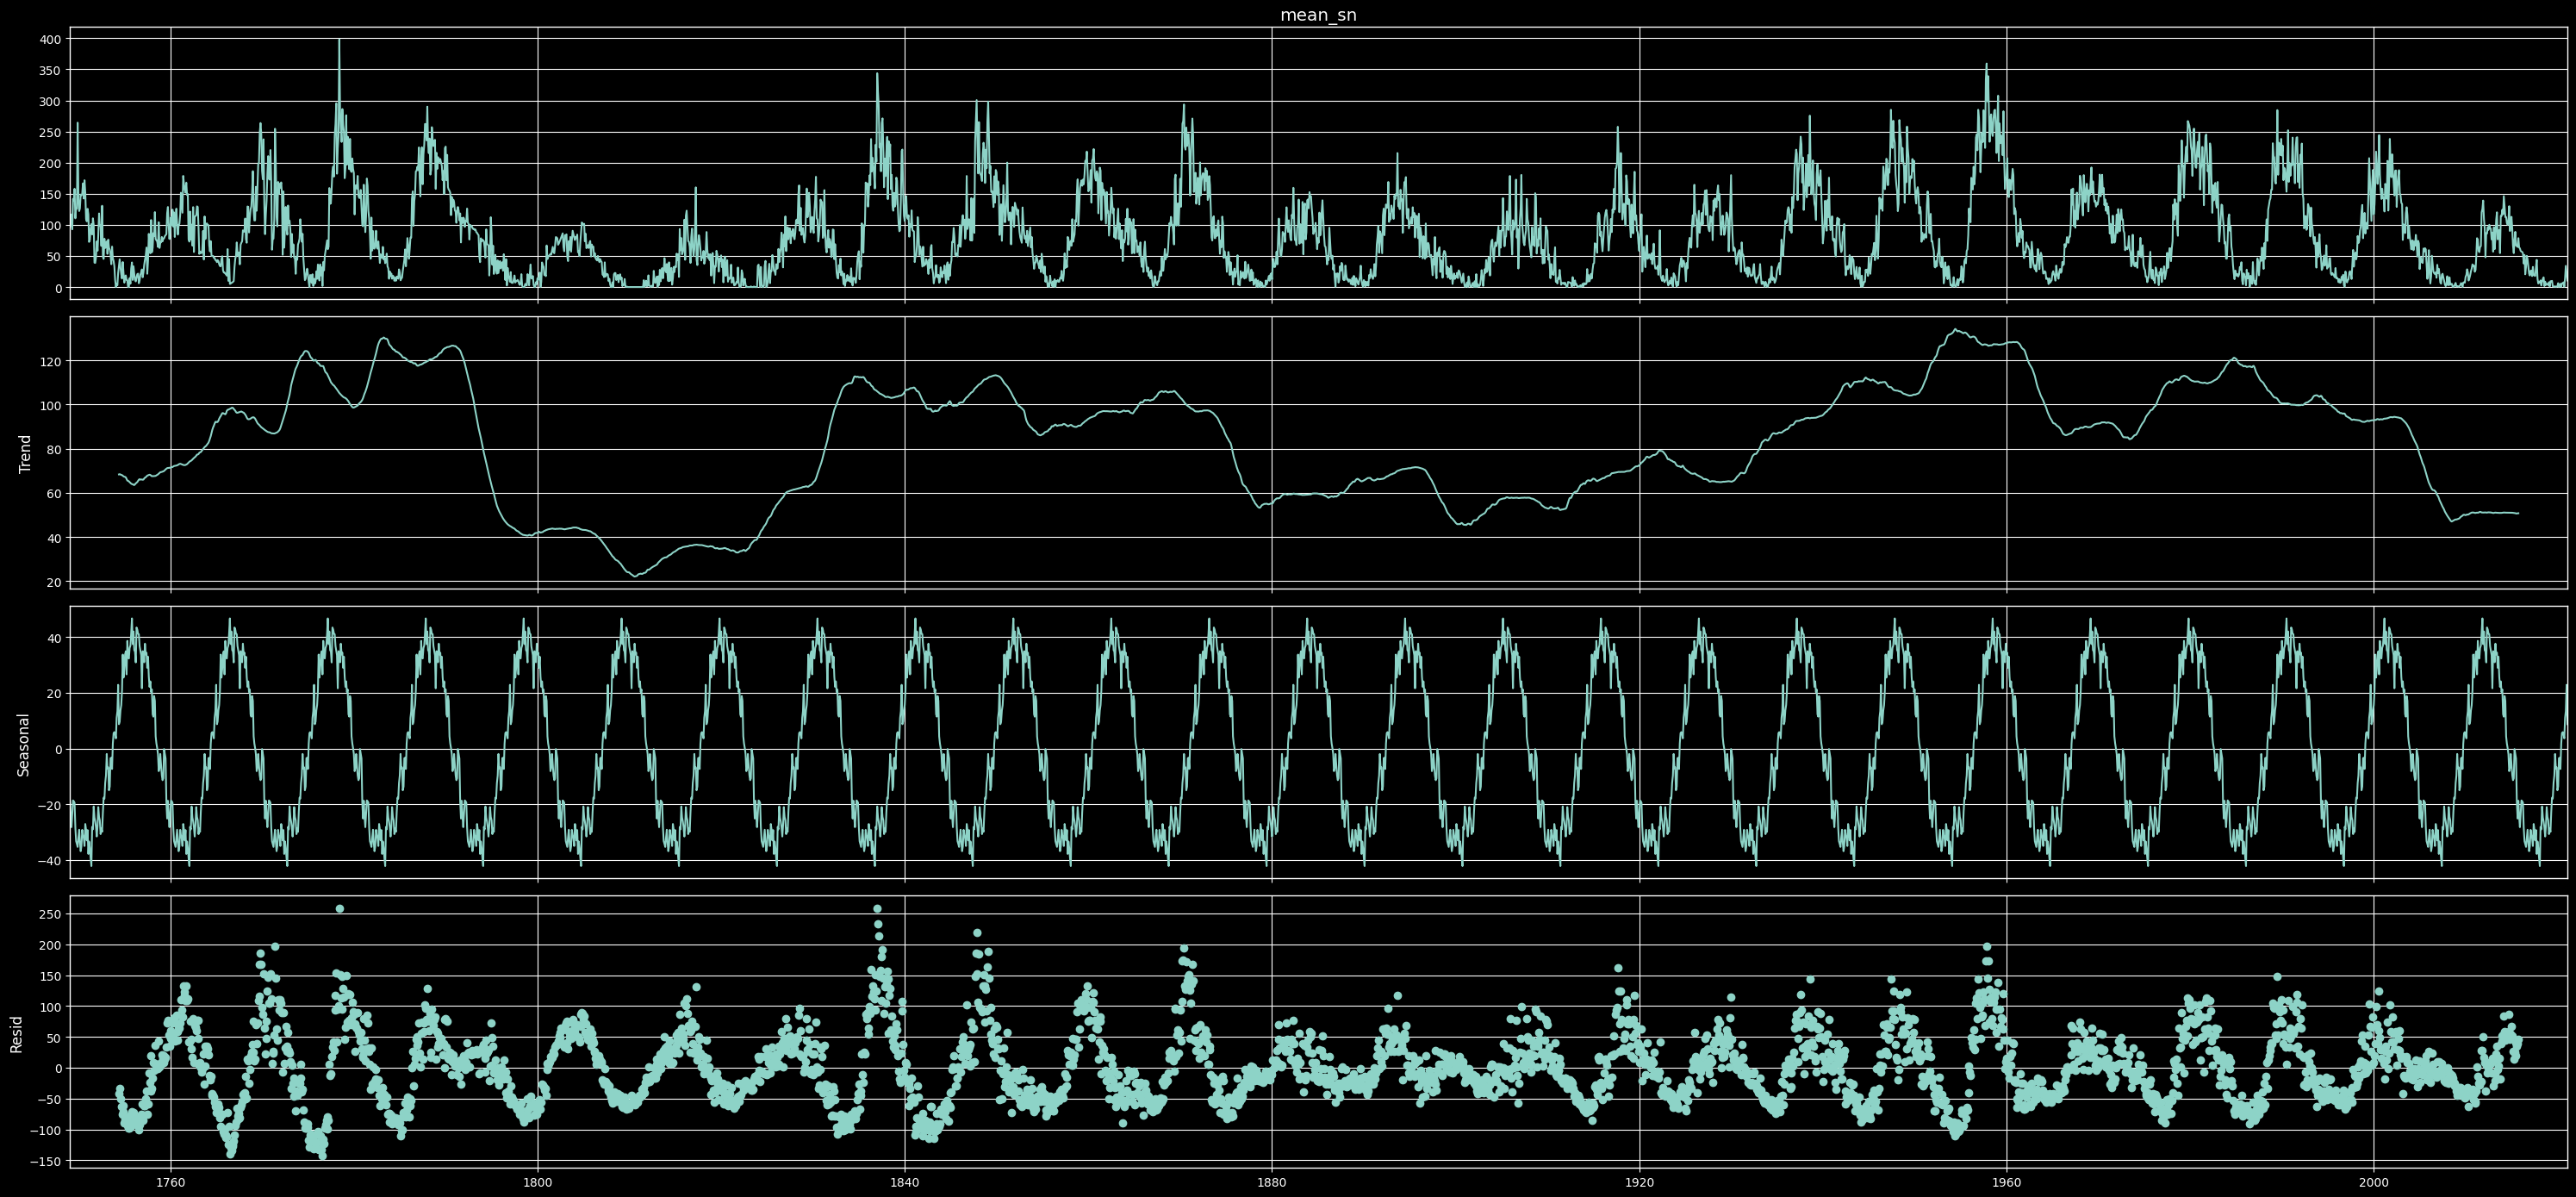

In [ ]:
# Usando Matplotlib y Statsmodels
# Descomposición aditiva
plt.rcParams['figure.figsize'] = (30, 14)
plt.style.use('dark_background')
a = seasonal_decompose(df_sunsp['mean_sn'], model = 'add', period = 128)
a.plot()
plt.show()

Se utiliza STL, acrónimo de "Seasonal-Trend decomposition using LOESS". Y LOESS, "locally estimated scatterplot smoothing". La idea es que STL maneja mejor estacionalidades más complejas.

El parámetro `seasonal` debe ser impar, positivo y mayor que `3`. Este parámetro es el tamaño de la ventana utilizada para el suavizado de la componente estacional. Si es mayor que el período de estacionalidad, el modelo puede capturar mejor las fluctuaciones, pero si es mucho más grande, puede suavizar demasiado los detalles estacionales.

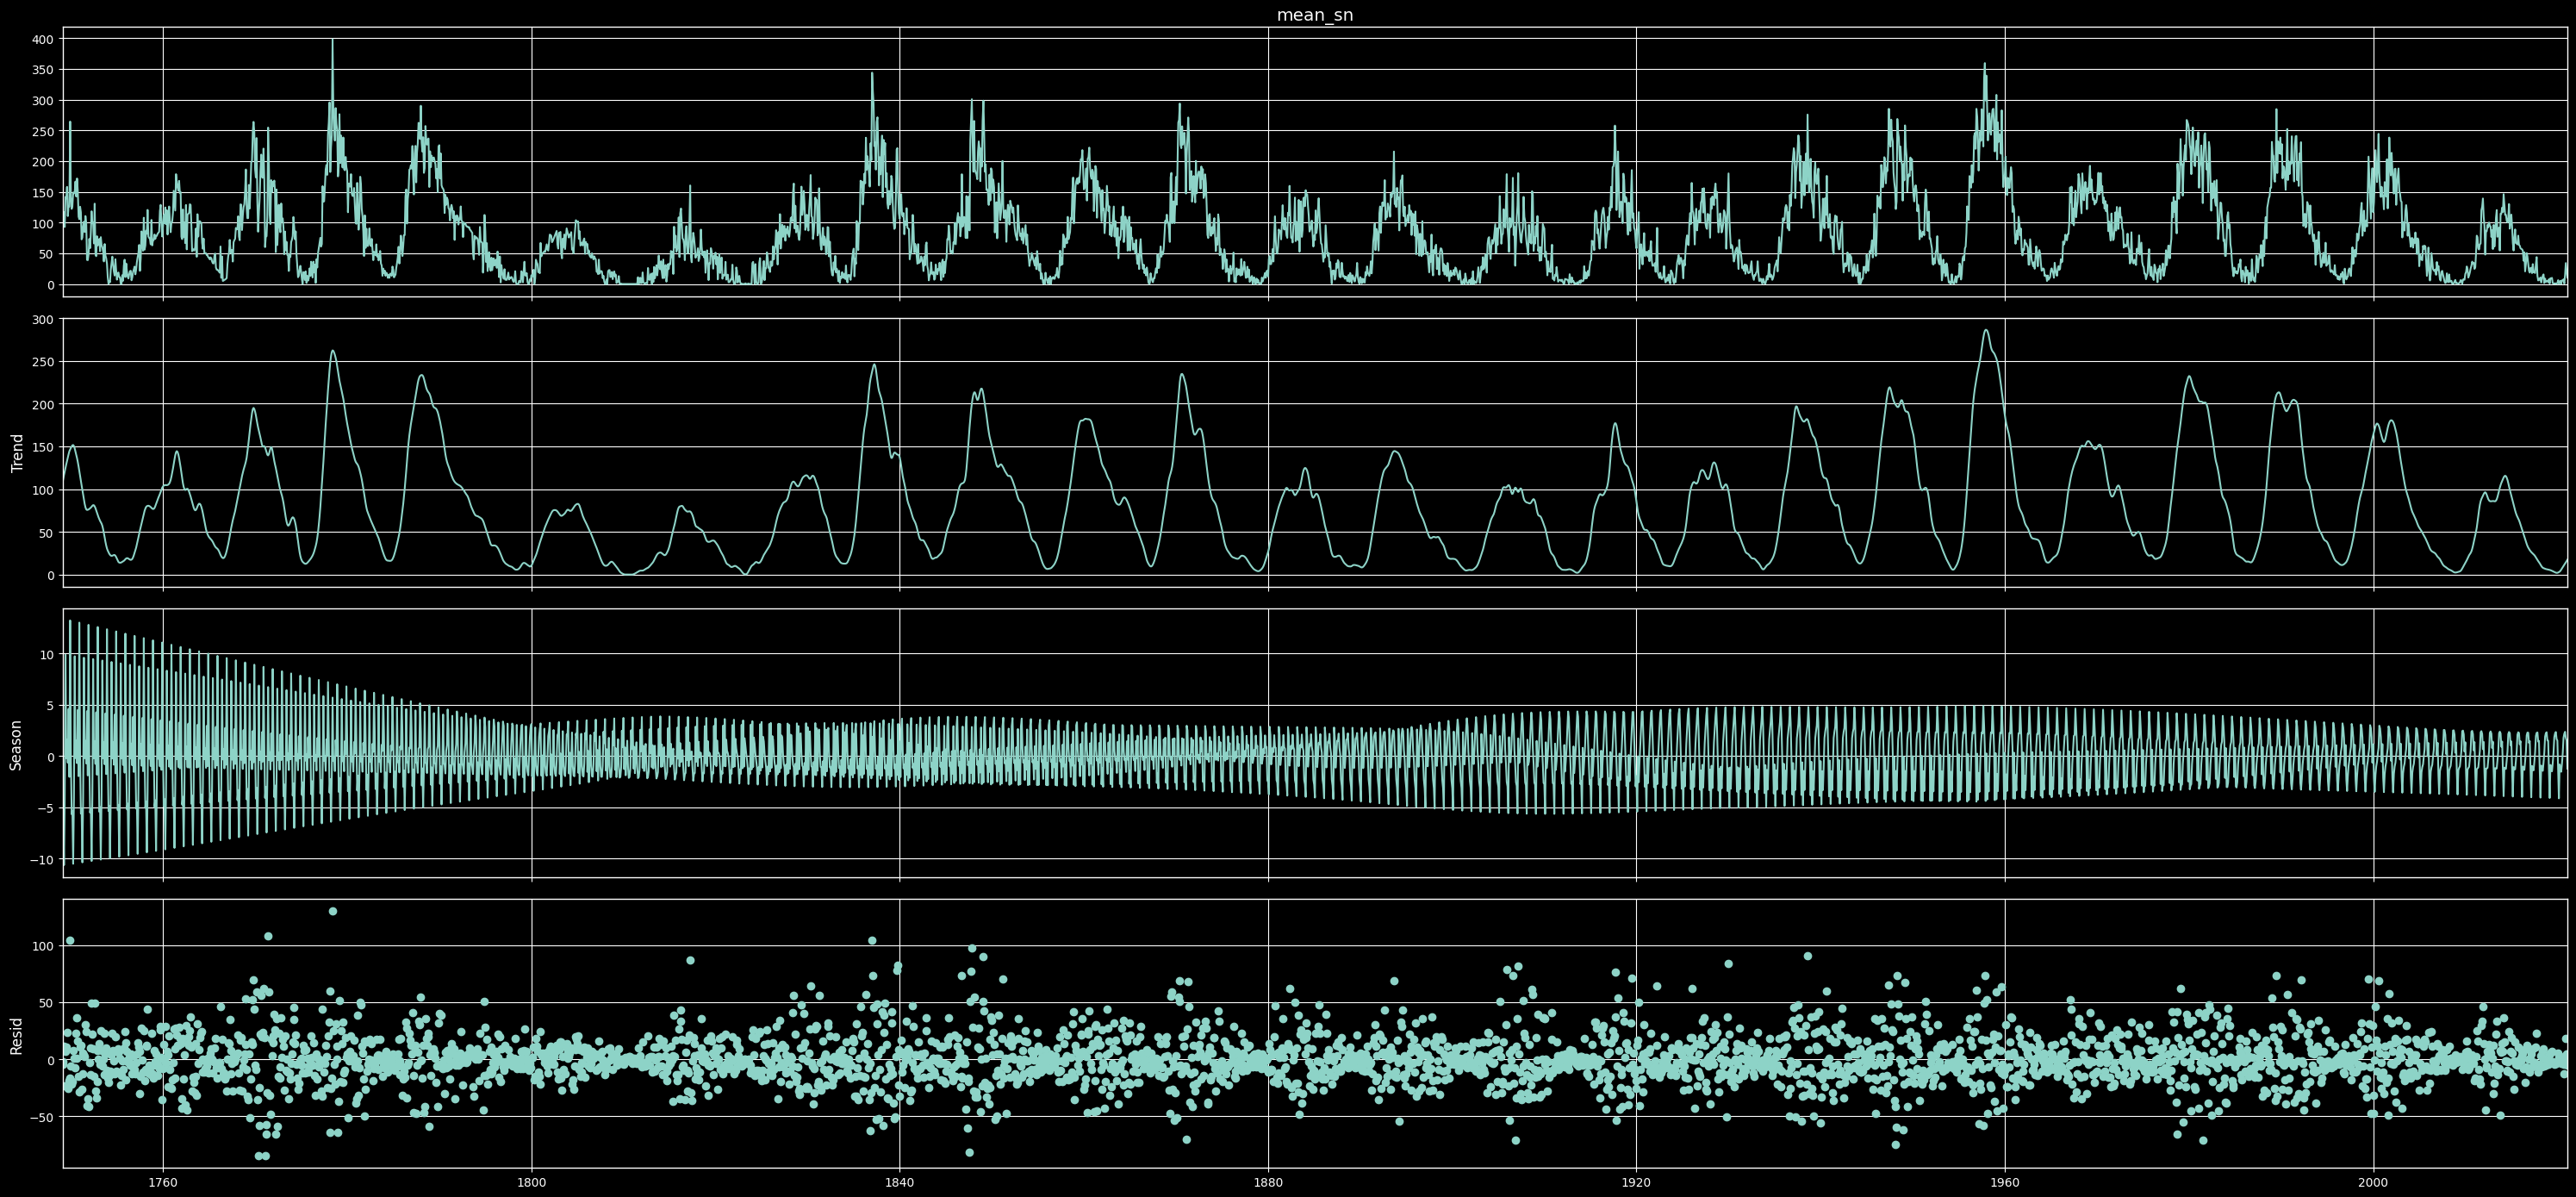

In [ ]:
# Usando Matplotlib y Statsmodels
# Descomposición STL
plt.rcParams['figure.figsize'] = (30, 14)
plt.style.use('dark_background')
stl = STL(df_sunsp['mean_sn'], seasonal = 129)
result = stl.fit()
result.plot()
plt.show()

## Autocorrelación

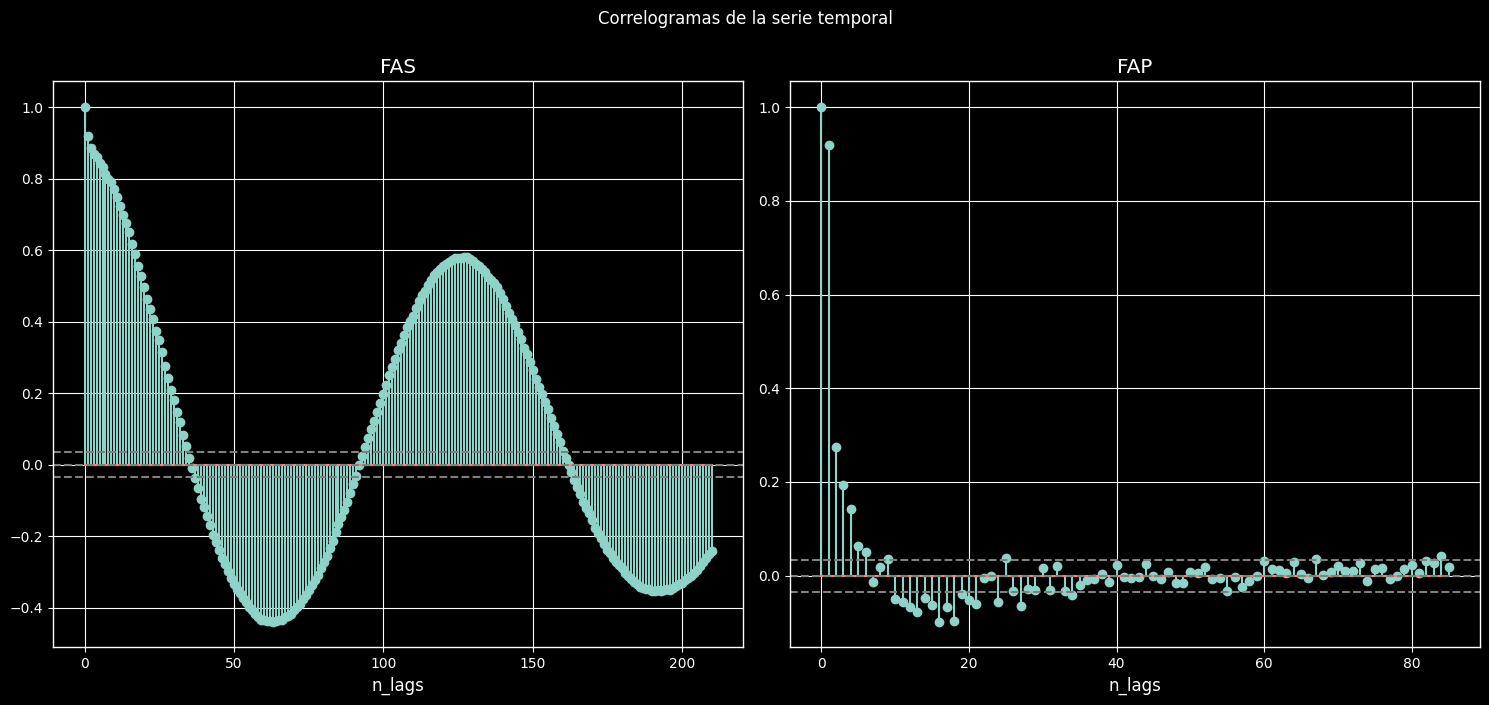

In [ ]:
# Uso de Statsmodels y Matplotlib
# Análisis de Autcorrelación
fas = sm.tsa.acf(df_sunsp, nlags = 210)
fap = sm.tsa.pacf(df_sunsp, nlags = 85)

fig, axs = plt.subplots(1, 2, figsize = (15,7))
fig.suptitle('Correlogramas de la serie temporal', y = 1)
axs[0].stem(fas)
axs[0].set_title('FAS')
axs[0].set_xlabel('n_lags')
axs[0].grid(True)
axs[0].axhline(y=0, linestyle='--', color='gray')
axs[0].axhline(y=-1.96/np.sqrt(len(df_sunsp)), linestyle='--', color='gray')
axs[0].axhline(y=1.96/np.sqrt(len(df_sunsp)), linestyle='--', color='gray')
axs[1].stem(fap)
axs[1].set_title('FAP')
axs[1].set_xlabel('n_lags')
axs[1].grid(True)
axs[1].axhline(y=0, linestyle='--', color='gray')
axs[1].axhline(y=-1.96/np.sqrt(len(df_sunsp)), linestyle='--', color='gray')
axs[1].axhline(y=1.96/np.sqrt(len(df_sunsp)), linestyle='--', color='gray')
plt.style.use('dark_background')
plt.tight_layout()
plt.show()

In [ ]:
print('Máximo valor de FAS en n_lags de 100 a 150:', fas[100:151].max())
print('Valor de n_lags para dicho máximo:', fas[100:151].argmax()+100)

Máximo valor de FAS en n_lags de 100 a 150: 0.5808736164794538
Valor de n_lags para dicho máximo: 128


Se asume estacionalidad con un período de 128 meses.

## Prueba de Dickey - Fuller

In [ ]:
# Descomposición de la Serie
def Prueba_Dickey_Fuller(series, column_name):
    print(f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No Lags Used', 'Número de observaciones utilizados'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    if dftest[1] < 0.05:
        print('Conclusión: ===')
        print('Rechazar la hipótesis nula')
        print('Los datos son estacionarios')
    else:
        print('Conclusión: ===')
        print('No se puede rechazar la hipótesis nula')
        print('Los datos no son estacionarios')

In [ ]:
Prueba_Dickey_Fuller(df_sunsp['mean_sn'], 'mean_sn')

Resultados de la prueba de Dickey-Fuller para columna: mean_sn
Test Statistic                       -1.049705e+01
p-value                               1.108552e-18
No Lags Used                          2.800000e+01
Número de observaciones utilizados    3.236000e+03
Critical Value (1%)                  -3.432372e+00
Critical Value (5%)                  -2.862434e+00
Critical Value (10%)                 -2.567246e+00
dtype: float64
Conclusión: ===
Rechazar la hipótesis nula
Los datos son estacionarios


## Búsqueda de Hiperparámetros

In [ ]:
# Uso de Plotly Express
# Crear el gráfico de líneas
fig = px.line(
    df_sunsp,
    x = df_sunsp.index,
    y = 'mean_sn',
    template = 'plotly_dark',
    title = 'Cantidad de manchas solares'
)
fig.update_traces(textposition = 'top center')
# Posición del índice n desde el final
index_position = len(df_sunsp) - 145
index_position2 = len(df_sunsp) - 1170
# Líneas verticales
fig.add_vline(
    x = df_sunsp.index[index_position],
    line_color = 'red',
    line_width = 2,
    line_dash = 'dash'
)
fig.add_vline(
    x = df_sunsp.index[index_position2],
    line_color = 'green',
    line_width = 2,
    line_dash = 'dot'
)
# Visualización
fig.show()

In [ ]:
'''
import itertools

# Definir el rango de hiperparámetros para ARIMA

p = range(0, 6)  # p: número de términos autoregresivos
d = range(0, 3)  # d: número de diferenciaciones necesarias para hacer la serie estacionaria
q = range(0, 6)  # q: número de términos de media móvil

# Definir el rango de hiperparámetros para el componente estacional
P = range(0, 3)  # P: número de términos autoregresivos estacionales
D = range(0, 2)  # D: número de diferenciaciones estacionales
Q = range(0, 3)  # Q: número de términos de media móvil estacionales
m = 128  # m: periodo estacional

# Generar todas las combinaciones posibles de los hiperparámetros
parametros = list(itertools.product(p, d, q))
parametros_estacionales = list(itertools.product(P, D, Q, [m]))

# Datos de entrenamiento
train_data = df_sunsp['mean_sn'][len(df_sunsp) - 1170:len(df_sunsp) - 145]

# Inicializar variables para almacenar los mejores resultados
mejor_aic = float('inf')
mejor_parametros = None
mejor_parametros_estacionales = None

# Bucle para iterar sobre todas las combinaciones de hiperparámetros
for param in parametros:
    for param_seasonal in parametros_estacionales:
        try:
            # Ajustar el modelo SARIMA con los parámetros actuales
            modelo = sm.tsa.statespace.SARIMAX(train_data,
                                    order=param,
                                    seasonal_order=param_seasonal,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            resultado = modelo.fit(disp=False)

            # Evaluar el modelo según el AIC
            if resultado.aic < mejor_aic:
                mejor_aic = resultado.aic
                mejor_parametros = param
                mejor_parametros_estacionales = param_seasonal

        except:
            continue

print(f'Mejores parámetros ARIMA: {mejor_parametros}')
print(f'Mejores parámetros estacionales: {mejor_parametros_estacionales}')
print(f'Mejor AIC: {mejor_aic}')
'''

"\nimport itertools\n\n# Definir el rango de hiperparámetros para ARIMA\n\np = range(0, 6)  # p: número de términos autoregresivos\nd = range(0, 3)  # d: número de diferenciaciones necesarias para hacer la serie estacionaria\nq = range(0, 6)  # q: número de términos de media móvil\n\n# Definir el rango de hiperparámetros para el componente estacional\nP = range(0, 3)  # P: número de términos autoregresivos estacionales\nD = range(0, 2)  # D: número de diferenciaciones estacionales\nQ = range(0, 3)  # Q: número de términos de media móvil estacionales\nm = 128  # m: periodo estacional\n\n# Generar todas las combinaciones posibles de los hiperparámetros\nparametros = list(itertools.product(p, d, q))\nparametros_estacionales = list(itertools.product(P, D, Q, [m]))\n\n# Datos de entrenamiento\ntrain_data = df_sunsp['mean_sn'][len(df_sunsp) - 1170:len(df_sunsp) - 145]\n\n# Inicializar variables para almacenar los mejores resultados\nmejor_aic = float('inf')\nmejor_parametros = None\nmejor_pa

## Preparación de Datos para los Modelos

Se separan los datos de tal forma que los últimos `145` regristros pertenezcan al conjunto de prueba. Los restrantes, al de entrenamiento.

In [ ]:
train_data = df_sunsp[:len(df_sunsp) - 145]
test_data = df_sunsp[len(df_sunsp) - 145:]
print(train_data.shape, test_data.shape)
print()
print(test_data.head(10))

(3120, 1) (145, 1)

            mean_sn
date               
2009-01-31      1.3
2009-02-28      1.2
2009-03-31      0.6
2009-04-30      1.2
2009-05-31      2.9
2009-06-30      6.3
2009-07-31      5.5
2009-08-31      0.0
2009-09-30      7.1
2009-10-31      7.7


## Modelo ARIMA

El primer modelo que se utilizaría sería con un modelo autoregresivo de medias móviles. Es decir que los datos del futuro responden a valores del pasado.

In [ ]:
# Uso de Statsmodels
modelo_auto = auto_arima(
    train_data,
    d = 1,
    start_p = 0,
    max_p = 5,
    max_d = 5,
    max_q = 5,
    start_P = 0,
    D = 1,
    start_Q = 0,
    max_P = 0,
    max_D = 1,
    max_Q = 2,
    m = 11, # Esto se obtiene derivado de 11 x 12 = 132 (aprox 128, dif 3 %) y en parte de https://robjhyndman.com/hyndsight/longseasonality/
    seasonal = True,
    error_action = 'warn',
    trace = True,
    suppress_warnings = True,
    stepwise = True,
    random_state = 20,
    n_fits = 200,
)

print(modelo_auto)

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(0,1,0)[11]             : AIC=30872.781, Time=2.16 sec
 ARIMA(0,1,0)(0,1,0)[11]             : AIC=31613.704, Time=0.96 sec
 ARIMA(1,1,0)(0,1,0)[11]             : AIC=31281.377, Time=0.51 sec
 ARIMA(0,1,1)(0,1,1)[11]             : AIC=inf, Time=13.20 sec
 ARIMA(0,1,2)(0,1,1)[11]             : AIC=inf, Time=9.65 sec
 ARIMA(0,1,1)(0,1,0)[11]             : AIC=30965.071, Time=1.64 sec
 ARIMA(1,1,2)(0,1,0)[11]             : AIC=30873.726, Time=1.68 sec
 ARIMA(0,1,3)(0,1,0)[11]             : AIC=30873.590, Time=1.33 sec
 ARIMA(1,1,1)(0,1,0)[11]             : AIC=30875.009, Time=1.00 sec
 ARIMA(1,1,3)(0,1,0)[11]             : AIC=30848.261, Time=3.72 sec
 ARIMA(1,1,3)(0,1,1)[11]             : AIC=inf, Time=23.74 sec
 ARIMA(2,1,3)(0,1,0)[11]             : AIC=30831.575, Time=7.49 sec
 ARIMA(2,1,3)(0,1,1)[11]             : AIC=inf, Time=31.97 sec
 ARIMA(2,1,2)(0,1,0)[11]             : AIC=30875.504, Time=3.11 sec
 ARIMA(3,1,3)(0,1,0)[11]  

In [ ]:
print(modelo_auto.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 3120
Model:             SARIMAX(2, 1, 3)x(0, 1, [], 11)   Log Likelihood              -15400.420
Date:                             Sat, 21 Sep 2024   AIC                          30814.840
Time:                                     23:50:59   BIC                          30857.132
Sample:                                 01-31-1749   HQIC                         30830.025
                                      - 12-31-2008                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.5611      0.672     -0.834      0.404      -1.879       0.757
ar.L1         -1.5579      

In [ ]:
arima_model = SARIMAX(
    train_data['mean_sn'],
    order = (2, 1, 3),
    seasonal_order = (0, 1, 0, 11)
)
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                             mean_sn   No. Observations:                 3120
Model:             SARIMAX(2, 1, 3)x(0, 1, [], 11)   Log Likelihood              -15409.788
Date:                             Sat, 21 Sep 2024   AIC                          30831.575
Time:                                     23:51:08   BIC                          30867.826
Sample:                                 01-31-1749   HQIC                         30844.591
                                      - 12-31-2008                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5654      0.029    -53.142      0.000      -1.623      -1.508
ar.L2         -0.5883      0.030    -19.930      0.000      -0.646      -0.530
ma.L1          1.0737      0.027     40.390      0.000       1.022       1.126
ma.L2         -0.4066      0.022    -18.136      0.000      -0.451      -0.363
ma.L3         -0.5581      0.015    -38.135      0.000      -0.587      -0.529
sigma2      1149.8823     20.376     56.432      0.000    1109.946    1189.819
===================================================================================
Ljung-Box (L1) (Q):                   1.28   Jarque-Bera (JB):               585.00
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.28
Prob(H) (two-sided):                  0.17   Kurtosis:                         5.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

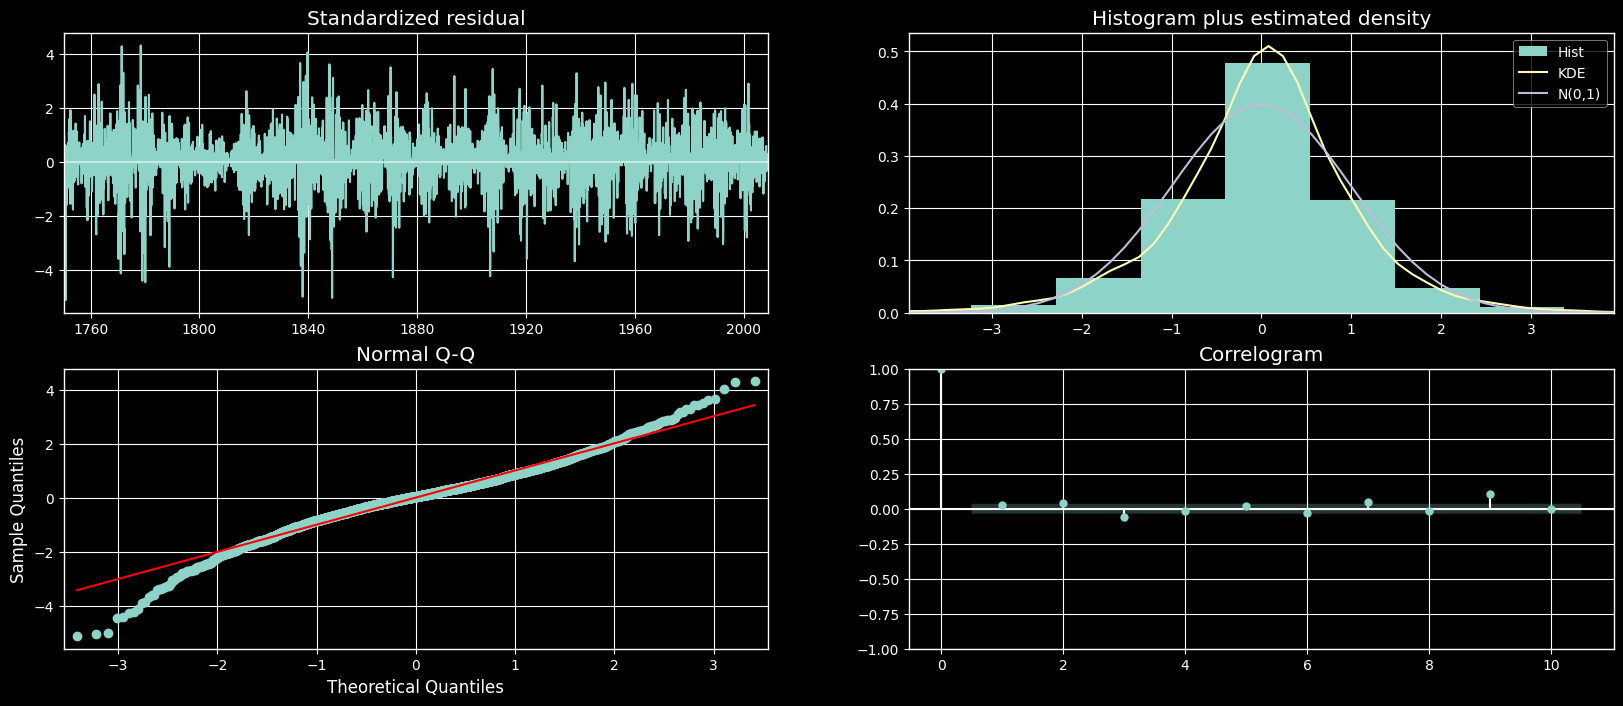

In [ ]:
modelo_auto.plot_diagnostics(figsize=(20, 8))
plt.style.use('dark_background')
plt.show()

In [ ]:
print(train_data[-10:])

            mean_sn
date               
2008-03-31     15.5
2008-04-30      3.6
2008-05-31      4.6
2008-06-30      5.2
2008-07-31      0.6
2008-08-31      0.3
2008-09-30      1.2
2008-10-31      4.2
2008-11-30      6.6
2008-12-31      1.0


In [ ]:
arima_pred = arima_result.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data) - 1,
    typ = 'levels'
).rename('ARIMA Predictions')
print(arima_pred.head())

2009-01-31    2.417976
2009-02-28    9.596239
2009-03-31    0.377783
2009-04-30    0.369959
2009-05-31    0.969935
Freq: M, Name: ARIMA Predictions, dtype: float64


In [ ]:
# Cálculo del promedio de los valores reales
mean_test_data = np.mean(test_data['mean_sn'])

In [ ]:
# MAE
mae = mean_absolute_error(test_data['mean_sn'], arima_pred)
print(f'MAE: {mae:.4f}')
# RMSE
rmse = np.sqrt(mean_squared_error(test_data['mean_sn'], arima_pred))
print(f'RMSE: {rmse:.4f}')
# RAE
rae_arima = np.sum(np.abs(test_data['mean_sn'] - arima_pred)) / np.sum(np.abs(test_data['mean_sn'] - mean_test_data))
print(f'RAE: {rae_arima:.4f}')
# R² Score
r2 = r2_score(test_data['mean_sn'], arima_pred)
print(f'R² Score: {r2:.4f}')

MAE: 70.1916
RMSE: 80.0761
RAE: 1.9449
R² Score: -2.8015


**RAE mayor que 1:** el modelo es peor que simplemente predecir la media de los datos de prueba. No está aportando valor en el pronóstico.

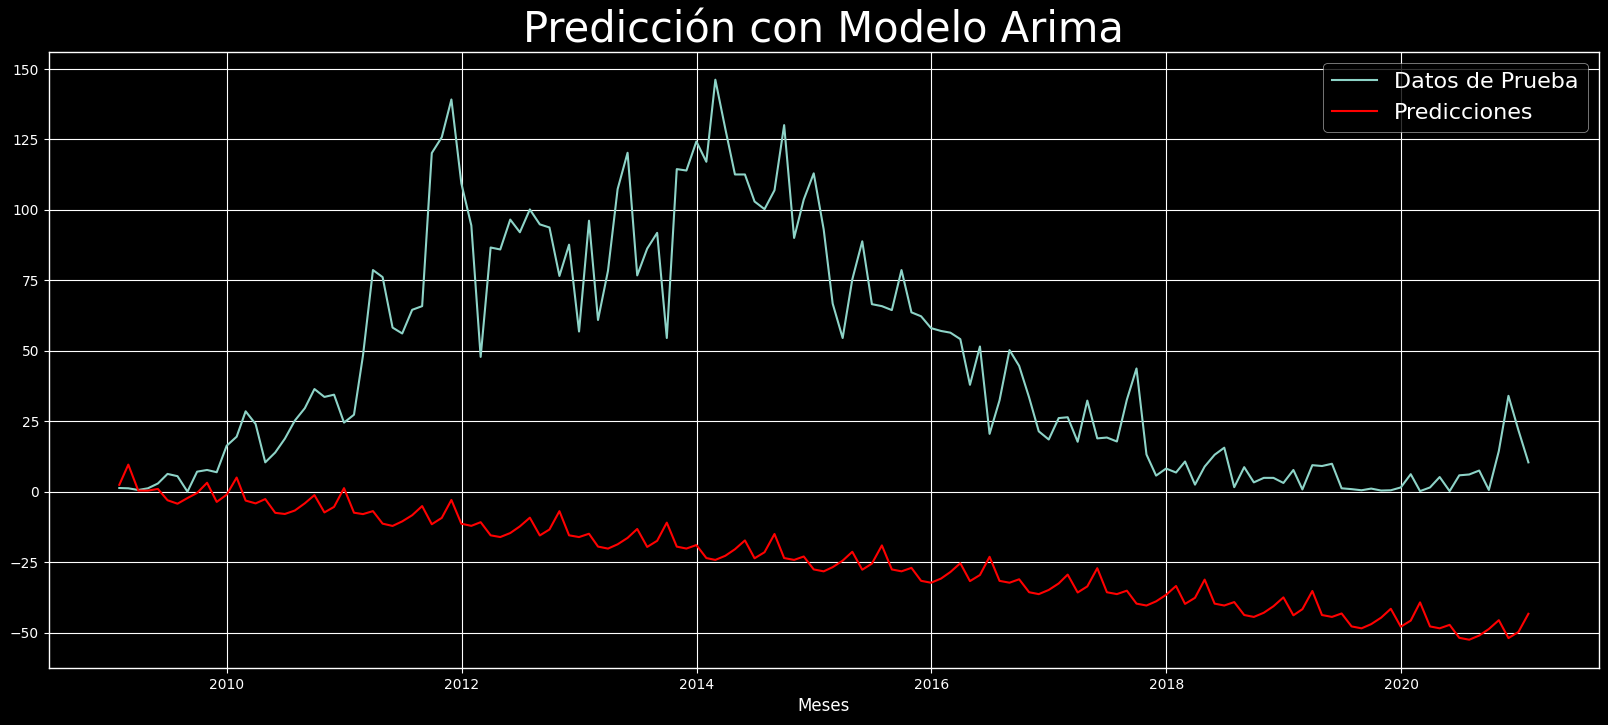

In [ ]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (20, 8)

plt.plot(test_data['mean_sn'], label = 'Datos de Prueba')
plt.plot(arima_pred, color='red', label = 'Predicciones')
plt.title('Predicción con Modelo Arima', fontsize = 30)
plt.xlabel('Meses')
plt.ylabel('')
plt.legend(fontsize = 16)
plt.show()

## Modelo TBATS

Modelo de pronóstico de series temporales combinando varias técnicas. Aborda limitaciones de los modelos clásicos (ARIMA): series temporales com patrones estacionales no constantes o irregularidades en la estacionalidad.

1. **T**: **Trend (Tendencia)**

2. **B**: **Box-Cox transformation** (estabiliza la varianza, acercando a distribución normal)

3. **A**: **Additive or Multiplicative seasonality**

4. **T**: **Trigonometric seasonality** (funciones trigonométricas para capturar patrones estacionales; p ej, múltiples ciclos estacionales)

5. **S**: **Smoothing**

**Ventajas:**
- Eficaz para estacionalidads compleja y no constantes.
- Manejar tanto tendencias como estacionalidades.
- Pronósticos a largo plazo efectivamente.

In [ ]:
estimador = TBATS(seasonal_periods = [128])
model_tbats = estimador.fit(train_data)
pronostico_tbats, int_conf = model_tbats.forecast(steps = 145, confidence_level = 0.95)
tbats = pd.Series(pronostico_tbats)
tbats.index = test_data.index

In [ ]:
# MAE
mae_tbats = mean_absolute_error(test_data['mean_sn'], tbats)
print(f'MAE (TBATS): {mae_tbats:.4f}')
# RMSE
rmse_tbats = np.sqrt(mean_squared_error(test_data['mean_sn'], tbats))
print(f'RMSE (TBATS): {rmse_tbats:.4f}')
# RAE
rae_tbats = np.sum(np.abs(test_data['mean_sn'] - tbats)) / np.sum(np.abs(test_data['mean_sn'] - mean_test_data))
print(f'RAE (TBATS): {rae_tbats:.4f}')
# R² Score
r2_tbats = r2_score(test_data['mean_sn'], tbats)
print(f'R² Score (TBATS): {r2_tbats:.4f}')

MAE (TBATS): 46.0575
RMSE (TBATS): 61.7638
RAE (TBATS): 1.2761
R² Score (TBATS): -1.2616


**RAE mayor que 1:** el modelo es peor que simplemente predecir la media de los datos de prueba. No está aportando valor en el pronóstico.

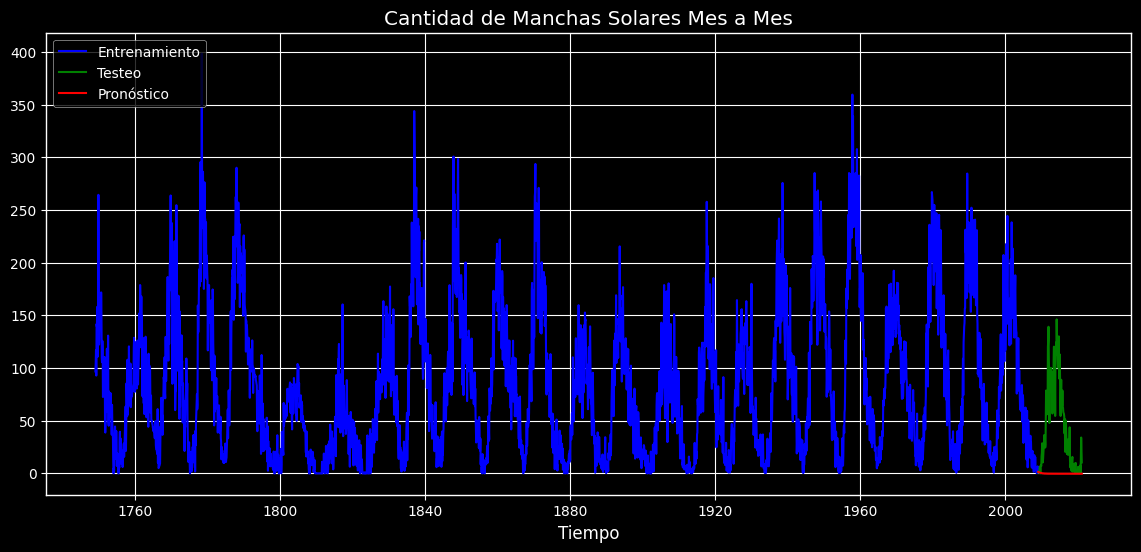

In [ ]:
rcParams['figure.figsize'] = 14, 6
plt.plot(train_data, c = 'blue', label = 'Entrenamiento')
plt.plot(test_data, c = 'green', label = 'Testeo')
plt.plot(tbats, c = 'red', label = 'Pronóstico')
plt.title('Cantidad de Manchas Solares Mes a Mes')
plt.xlabel('Tiempo')
plt.legend(loc='upper left', fontsize=10)
plt.show()

## Regresión con Random Forest

Se genera un nuevo `DataFrame` para trabajar con este otro modelo.

In [ ]:
df_sunreg = df_sunsp.reset_index()
print(df_sunreg.head())

        date  mean_sn
0 1749-01-31     96.7
1 1749-02-28    104.3
2 1749-03-31    116.7
3 1749-04-30     92.8
4 1749-05-31    141.7


El regresor por random forest no puede manejar datos de tipo `datetime64[ns]`, por lo que se extraen los meses y los años. Los días son irrelevantes, ya que originalmente el conjunto de datos presenta valores medios mensuales.

In [ ]:
df_sunreg['year'] = df_sunreg['date'].dt.year
df_sunreg['month'] = df_sunreg['date'].dt.month
print(df_sunreg.head())

        date  mean_sn  year  month
0 1749-01-31     96.7  1749      1
1 1749-02-28    104.3  1749      2
2 1749-03-31    116.7  1749      3
3 1749-04-30     92.8  1749      4
4 1749-05-31    141.7  1749      5


In [ ]:
analiza_df(df_sunreg)

                tp_dato  #_unico  #_!nulo  #_nulos  %_nulos
date     datetime64[ns]     3265     3265        0      0.0
mean_sn         float64     1599     3265        0      0.0
year              int32      273     3265        0      0.0
month             int32       12     3265        0      0.0 

Además:

El total de nulos es: 0

Y el DataFrame tiene 3265 filas y 4 columnas.


Separación en variables explicativas, en `X`, y la objetivo en `y`.

In [ ]:
X = df_sunreg.drop(columns = ['mean_sn', 'date'])
y = df_sunreg['mean_sn']
print(X.head())
print()
print(y.head())

   year  month
0  1749      1
1  1749      2
2  1749      3
3  1749      4
4  1749      5

0     96.7
1    104.3
2    116.7
3     92.8
4    141.7
Name: mean_sn, dtype: float64


Separación de los datos en subconjuntos de entrenamiento y prueba, considerando que los últimos `145` sean los de prueba, por consistencia con los pronósticos realizados anteriormente.

In [ ]:
X_train = X[:len(df_sunreg) - 145]
X_test = X[len(df_sunreg) - 145:]
y_train = y[:len(df_sunreg) - 145]
y_test = y[len(df_sunreg) - 145:]

In [ ]:
# Entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 17890714)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=17890714)

In [ ]:
# Realizar predicciones
rf_predictions = rf_model.predict(X_test)
# Crear un DataFrame para las predicciones
rf_pred_series = pd.Series(rf_predictions, index = df_sunreg.date[-145:])
rf_pred_series.name = 'mean_sn'
y_test.index = df_sunreg.date[-145:]
print(rf_pred_series.head(10))

date
2009-01-31     8.459
2009-02-28     5.430
2009-03-31    10.833
2009-04-30     5.509
2009-05-31     5.228
2009-06-30     5.233
2009-07-31     2.746
2009-08-31     1.167
2009-09-30     1.436
2009-10-31     3.586
Name: mean_sn, dtype: float64


In [ ]:
# Cálculo del promedio de los valores reales
mean_y_test = np.mean(y_test)

In [ ]:
# MAE
mae_rf = mean_absolute_error(y_test, rf_pred_series)
print(f'MAE (Random Forest): {mae_rf:.4f}')
# RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred_series))
print(f'RMSE (Random Forest): {rmse_rf:.4f}')
# RAE
rae_rf = np.sum(np.abs(y_test - rf_pred_series)) / np.sum(np.abs(y_test - mean_y_test))
print(f'RAE (Random Forest): {rae_rf:.4f}')
# R² Score
r2_rf = r2_score(y_test, rf_pred_series)
print(f'R² Score (Random Forest): {r2_rf:.4f}')

MAE (Random Forest): 42.1461
RMSE (Random Forest): 58.0938
RAE (Random Forest): 1.1678
R² Score (Random Forest): -1.0008


**RAE mayor que 1:** el modelo es peor que simplemente predecir la media de los datos de prueba. No está aportando valor en el pronóstico.

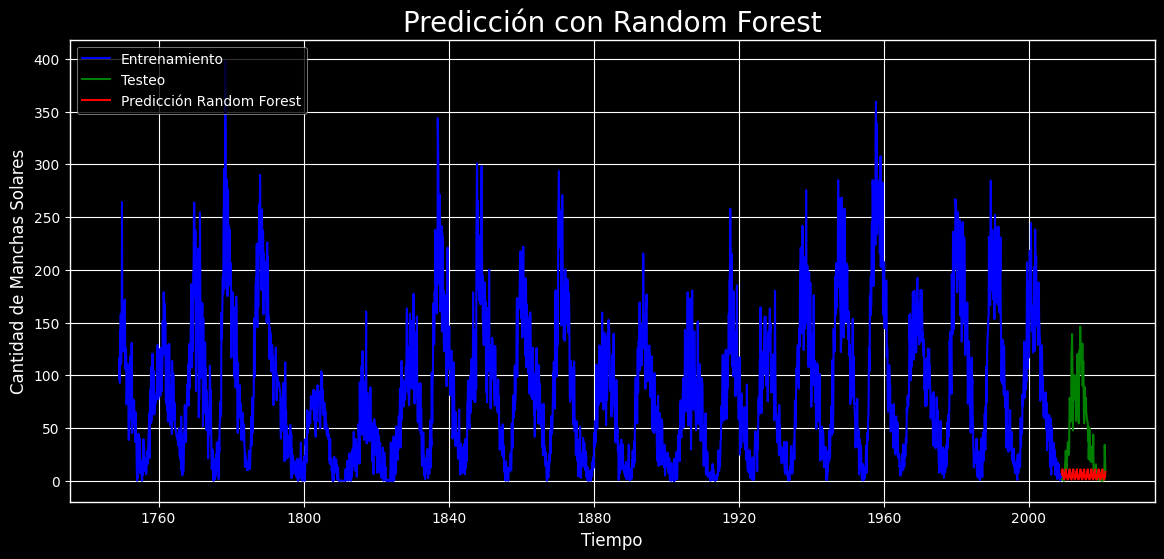

In [ ]:
# Graficar resultados
rcParams['figure.figsize'] = 14, 6
plt.plot(train_data['mean_sn'], c = 'blue', label = 'Entrenamiento')
plt.plot(test_data['mean_sn'], c = 'green', label = 'Testeo')
plt.plot(rf_pred_series, c = 'red', label = 'Predicción Random Forest')
plt.title('Predicción con Random Forest', fontsize = 20)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Manchas Solares')
plt.legend(loc = 'upper left', fontsize = 10)
plt.show()

## Conclusiones
- Las estacionalidades largas pueden causar usos elevados de RAM.
- Resulta necesario un mayor conocimiento de las herramientas para el análisis de series temporales.

NOTA:

Buscar regularización para series temporales.

Probar con GPUs.

Regularización:

Regularización Lasso (L1) y Ridge (L2):

Lasso (L1): Penaliza la suma de los valores absolutos de los coeficientes. Esta regularización puede llevar algunos coeficientes a cero, eliminando términos irrelevantes y reduciendo la complejidad del modelo.

Ridge (L2): Penaliza la suma de los cuadrados de los coeficientes, evitando que algunos coeficientes se vuelvan demasiado grandes y reduciendo el sobreajuste sin eliminar completamente términos.
Elastic Net (L1 + L2): Combina L1 y L2, lo que proporciona una forma de regularización más robusta al eliminar algunos coeficientes mientras se reducen otros.

Aplicar Métodos Bayesianos en Modelos ARIMA:

Para implementar un enfoque bayesiano en modelos ARIMA, se puede usar otras bibliotecas como  PyMC3 para crear modelos con distribuciones previas y ajustar los parámetros en consecuencia

Redes neuronales recurrentes! No convolucionales.